In [44]:
library("igraph")

In [45]:
files = list.files(path = "./gplus/gplus", pattern = "*.circles")
path = "./gplus/gplus/"
print (length(files))

[1] 132


In [46]:
numberOfCircles = function(filepath) {
  f = file(filepath, "r")
  count = 0
  while ( TRUE ) {
    line = readLines(f, n = 1)
    if ( length(line) == 0 ) {
      break
    }
    count = count + 1
  }
  close(f)
 return (count)
}

In [47]:
file_2circles = list()
for (fname in files) {
    if (numberOfCircles(paste(path,fname,sep = "")) > 2)
        {
         file_2circles = append(file_2circles, strsplit(fname, "\\.")[[1]][[1]])
    }
}

In [48]:
length(file_2circles)

[1] 57

In [49]:
# Creating graphs

In [50]:
getNodes = function(filepath, egoNode) {
    nodelist = list()
    f = file(filepath, "r")
    while ( TRUE ) {
    line = readLines(f, n = 1)
    if ( length(line) == 0 ) {
      break
    }
    s = strsplit(line, " ")
    nodelist = append(nodelist, c(s[[1]][1], egoNode))
    nodelist = append(nodelist, c(s[[1]][2], egoNode))
  }
  close(f)
  return (nodelist)
}

In [51]:
graphs = list()
for (f in file_2circles) {
    mat <- scan(paste(path,f,".edges",sep = ""), what="character")
    edge_mat <- matrix(mat, ncol = 2, byrow = TRUE)
    edge_mat = cbind(edge_mat[,2],edge_mat[,1])
    nodes = unique(matrix(mat, ncol=1))
    ego_list = matrix(rep(f, length(nodes)), ncol=1)
    ego_edges = cbind(nodes, ego_list)
    edges = rbind(ego_edges, edge_mat)
    g = graph_from_edgelist(edges, directed=TRUE)
    graphs = append(graphs, list(g))
}

In [52]:
length(graphs)

[1] 57

In [53]:
ids = c("109327480479767108490", "115625564993990145546", "101373961279443806744")

In [54]:
i1 = 0
i2 = 0 
i3 = 0

for (i in 1:length(file_2circles)){
   if (file_2circles[i] == ids[1]){
       i1 = i
   }
   if (file_2circles[i] == ids[2]){
       i2 = i
   } 
    if (file_2circles[i] == ids[3]){
       i3 = i
   } 
}

In [55]:
graphs_3 = list()
for (f in ids) {
    mat <- scan(paste(path,f,".edges",sep = ""), what="character")
    edge_mat <- matrix(mat, ncol = 2, byrow = TRUE)
    edge_mat = cbind(edge_mat[,2],edge_mat[,1])
    nodes = unique(matrix(mat, ncol=1))
    ego_list = matrix(rep(f, length(nodes)), ncol=1)
    ego_edges = cbind(nodes, ego_list)
    edges = rbind(ego_edges, edge_mat)
    g = graph_from_edgelist(edges, directed=TRUE)
    graphs_3 = append(graphs_3, list(g))
}

In [56]:
g1 = graphs_3[[1]]
g2 = graphs_3[[2]]
g3 = graphs_3[[3]]

In [57]:
dd1_in = degree_distribution(g1, mode = "in")
dd1_out = degree_distribution(g1, mode = "out")

dd2_in = degree_distribution(g2, mode = "in")
dd2_out = degree_distribution(g2, mode = "out")

dd3_in = degree_distribution(g3, mode = "in")
dd3_out = degree_distribution(g3, mode = "out")

In [58]:
lab1_in = seq(0, length(dd1_in)-1)
lab1_out = seq(0, length(dd1_out)-1)

lab2_in = seq(0, length(dd2_in)-1)
lab2_out = seq(0, length(dd2_out)-1)

lab3_in = seq(0, length(dd3_in)-1)
lab3_out = seq(0, length(dd3_out)-1)

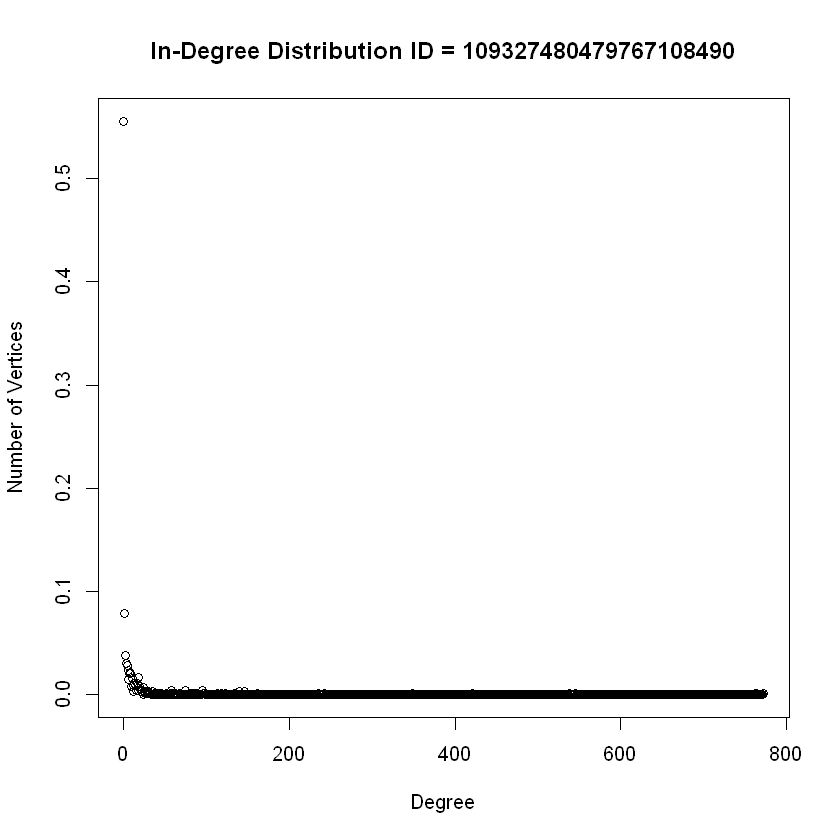

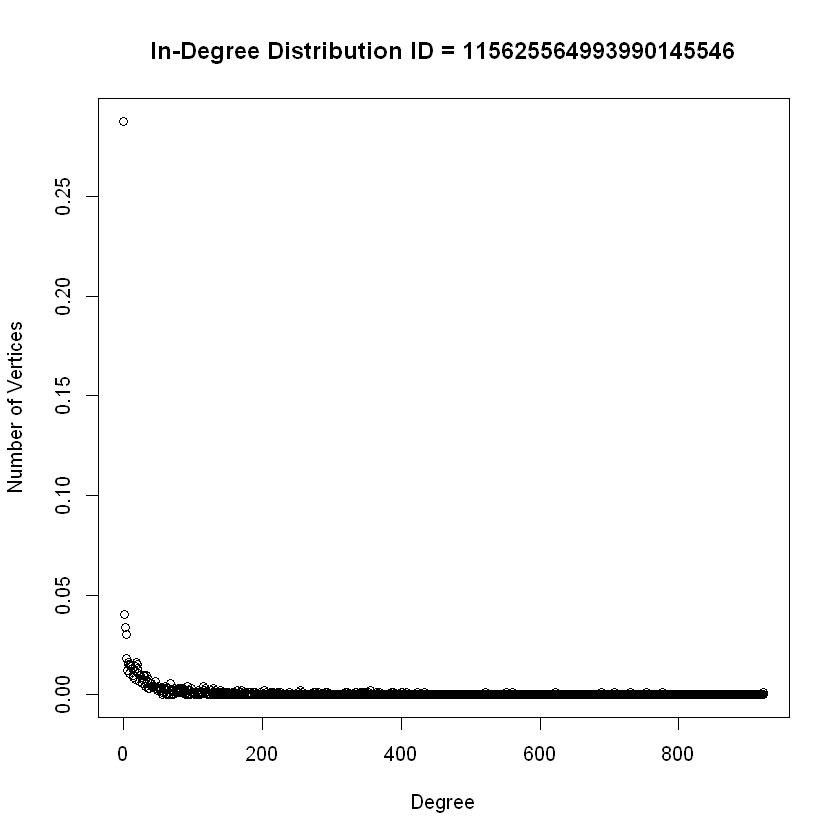

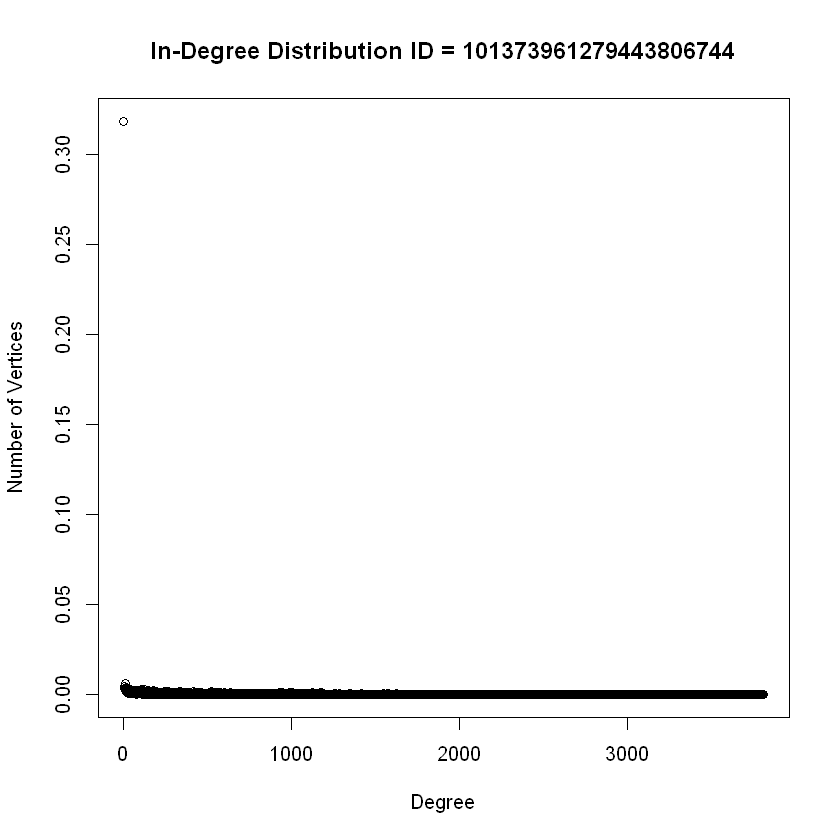

In [59]:
plot(lab1_in, dd1_in, type="p", main="In-Degree Distribution ID = 109327480479767108490", xlab="Degree", ylab="Number of Vertices")

plot(lab2_in, dd2_in, type="p", main="In-Degree Distribution ID = 115625564993990145546", xlab="Degree", ylab="Number of Vertices")

plot(lab3_in, dd3_in, type="p", main="In-Degree Distribution ID = 101373961279443806744", xlab="Degree", ylab="Number of Vertices")

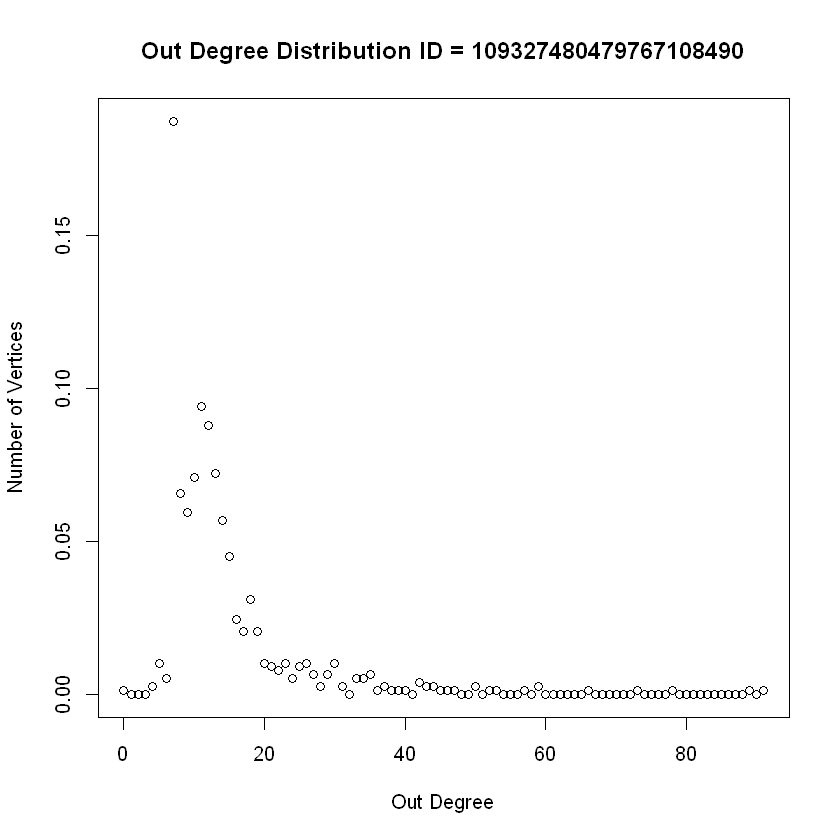

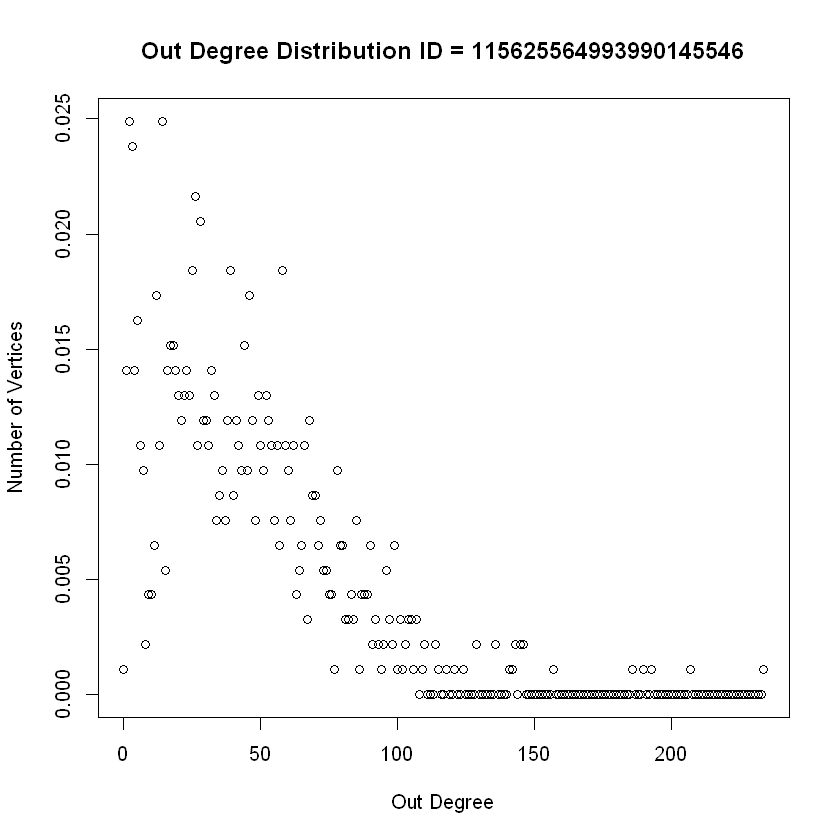

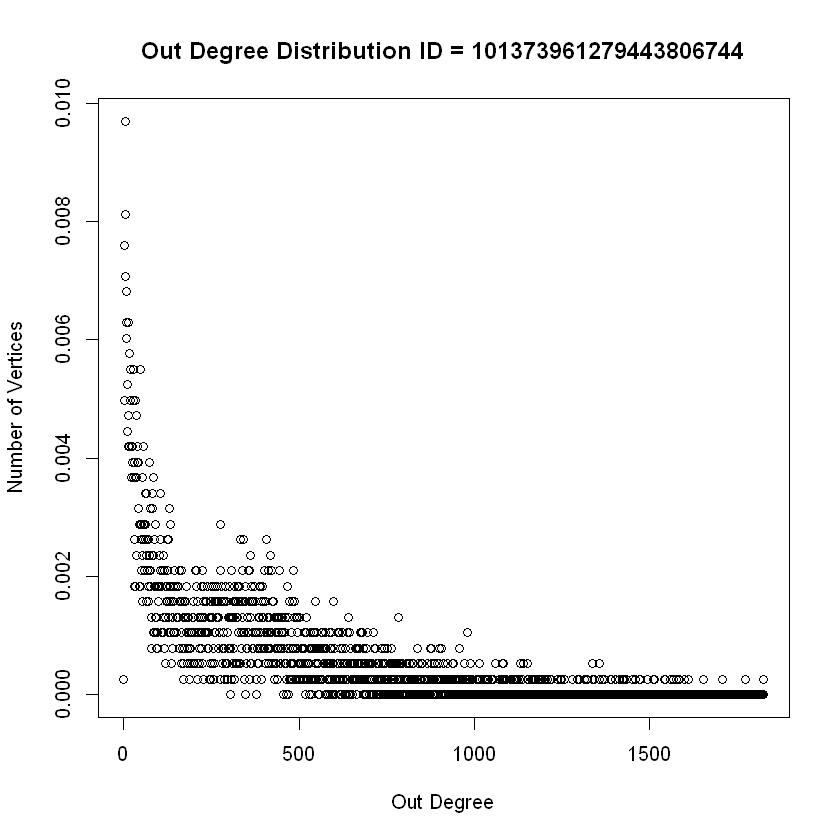

In [62]:
plot(lab1_out, dd1_out, type="p", main="Out Degree Distribution ID = 109327480479767108490", xlab="Out Degree", ylab="Number of Vertices")

plot(lab2_out, dd2_out, type="p", main="Out Degree Distribution ID = 115625564993990145546", xlab="Out Degree", ylab="Number of Vertices")

plot(lab3_out, dd3_out, type="p", main="Out Degree Distribution ID = 101373961279443806744", xlab="Out Degree", ylab="Number of Vertices")

In [63]:
# Finding Community Structure

In [64]:
cw1 = cluster_walktrap(g1)
cw2 = cluster_walktrap(g2)
cw3 = cluster_walktrap(g3)

[1] 0.2527654

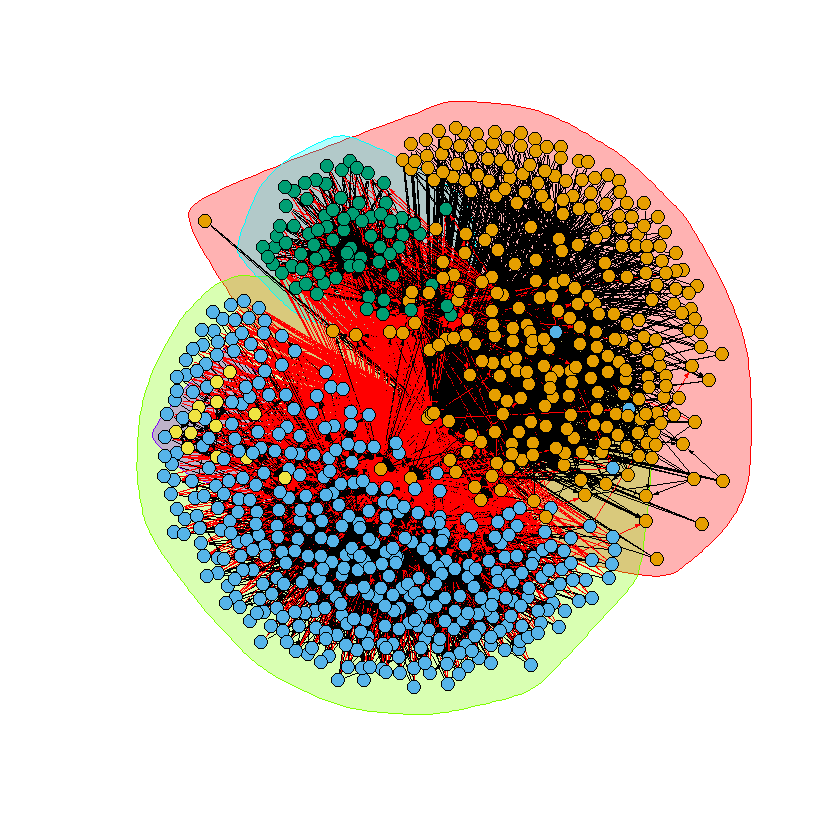

In [65]:
g1_mem = membership(cw1)
modularity(g1, g1_mem)

layout <-layout.fruchterman.reingold(g1)
plot(cw1, g1,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)

[1] 0.3194726

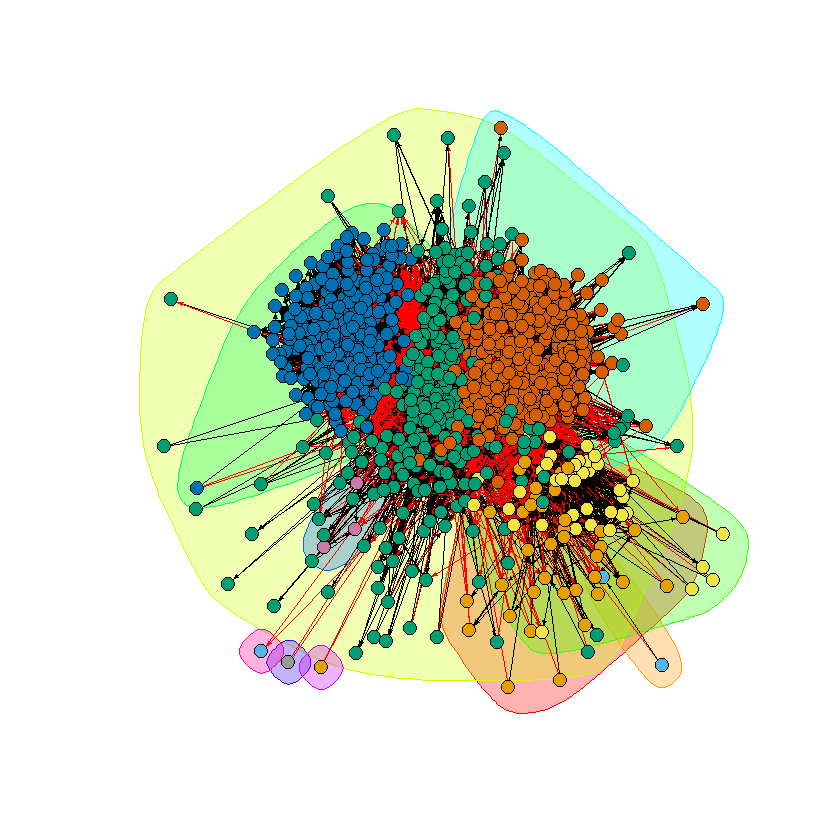

In [66]:
g2_mem = membership(cw2)
modularity(g2, g2_mem)

layout <-layout.fruchterman.reingold(g2)
plot(cw2, g2,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)

[1] 0.1910903

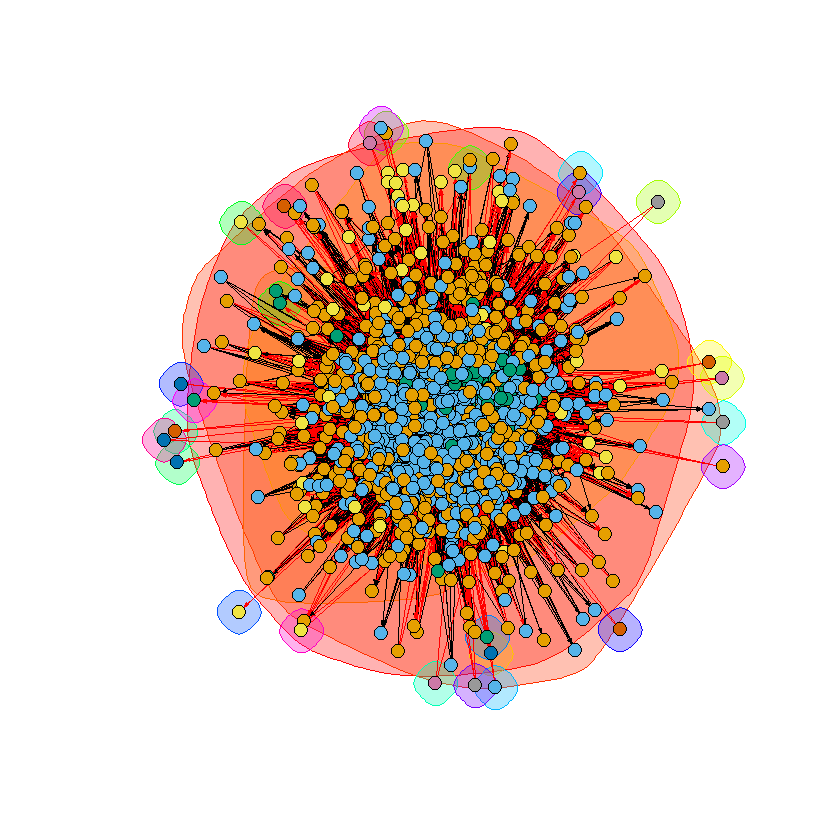

In [67]:
g3_mem = membership(cw3)
modularity(g3, g3_mem)

layout <-layout.fruchterman.reingold(g3)
plot(cw3, g3,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)

In [68]:
# Homogenity and Completeness

In [69]:
file_1circle = list()
for (fname in files) {
    if (numberOfCircles(paste(path,fname,sep = "")) >= 1)
        {
         file_1circle = append(file_1circle, strsplit(fname, "\\.")[[1]][[1]])
    }
    else {
        print (fname)
    }
}

[1] "111278293763545982455.circles"


In [70]:
getCircles = function(filepath) {
  f = file(filepath, "r")
  c = list()
  while ( TRUE ) {
    line = readLines(f, n = 1)
    if ( length(line) == 0 ) {
      break
    }
    c = append (c, list(strsplit(line, "\t")[[1]][-1]))
  }
    close(f)
    return (c)
}

In [71]:
cir1 = getCircles(paste(path, ids[1], ".circles", sep = ""))
cir2 = getCircles(paste(path, ids[2], ".circles", sep = ""))
cir3 = getCircles(paste(path, ids[3], ".circles", sep = ""))

In [72]:
print (length(cir1))
print (length(cir2))
print (length(cir3))

[1] 3
[1] 31
[1] 3


In [73]:
find_homogenity_completeness = function(cw, cir) { 
    
    circle_info = list()
    for (i in 1:length(cir)) {
       circle_info = append(circle_info, cir[[i]]) 
    }
    circle_info = unique(circle_info)
    
    # Total number f people with circle information
#     n = length(N) 
    n = length(circle_info)
#     print (n)
    
    # Number of people in circles
    a = list()
    for (i in 1:length(cir)) {
#        a = append (a, (length(intersect(cir[[i]],N))))
        a = append (a, length(cir[[i]])) 
    }
#     print (a)
    
    # Number of people in communitys with circle information
    b = list()
    for (i in 1:length(cw)) {
#        b = append (b, (length(intersect(cw[[i]],N))))
        b = append (b, (length(intersect(cw[[i]],circle_info))))
    }
#     print (b)
    
    # Aji -> people in community j and circle i
    A = matrix(0, length(cw), length(cir))
    for (j in 1:length(cw)){
        for (i in 1:length(cir)){
#             A[j,i] = length(intersect(cw[[j]], cir[[i]]))
            A[j,i] = length(intersect(intersect(cw[[j]], circle_info), cir[[i]]))
        }
    }
#     print (A)
    
    # HC
    HC = 0.0
    for (i in 1:length(cir)){
        if (a[[i]] != 0) {
        HC = HC + ( (a[[i]]/n) * (log(a[[i]]/n)) )
        }
    }
    HC = -1 * HC
#     print (HC)

    # HK
    HK = 0.0
    for (i in 1:length(cw)){
        if (b[[i]] != 0) {
        HK = HK + ( (b[[i]]/n) * (log(b[[i]]/n)) )
        }
    }
    HK = -1 * HK
#     print (HK)
    
    # HCK
    HCK = 0.0
    for (j in 1:length(cw)){
        for (i in 1:length(cir)){
            if (A[j,i] != 0) {
            HCK = HCK + ((A[j,i]/n)*log(A[j,i]/b[[j]]))
            }
        }
    }
    HCK = -1 * HCK
#     print (HCK)

    # HKC
    HKC = 0.0
    for (i in 1:length(cir)){
        for (j in 1:length(cw)){
            if (A[j,i] != 0){
            HKC = HKC + ((A[j,i]/n)*log(A[j,i]/a[[i]]))
            }
        }
    }
    HKC = -1 * HKC
#     print (HKC)    
    
    # Homegeneity and Continuity
    h = 1 - (HCK/HC)
    c = 1 - (HKC/HK)   
    
    print (h)
    print (c)
}

In [74]:
find_homogenity_completeness(cw1, cir1)

[1] 0.8518851
[1] 0.3298739


In [75]:
find_homogenity_completeness(cw2, cir2)

[1] 0.4518903
[1] -3.423962


In [76]:
find_homogenity_completeness(cw3, cir3)

[1] 0.003866707
[1] -1.504238


In [138]:
cw = list(list(1,2,3,4,5),list(6,7,8,9))
cir = list(list(1,2,3,4,5,8,9,6,7), list(8,9,6,7))
find_homogenity_completeness(cw,cir)

[1] 1
[1] 0
